In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gym

from utils import discretize_space_uniform, discretize_space_non_uniform, moving_avg
import Models.Random as Random
import Models.Sarsa as Sarsa
import Models.Q_learning as Q_learning
import Models.Sarsa_va_sg as Sarsa_va_sg
import Models.Sarsa_va_ANN as Sarsa_va_ANN


#from my_lunar_lander import LunarLander
#env = LunarLander()
env = gym.make("LunarLander-v2")

### Run the model-free sarsa and q_learning models
random results are showed for comparison

In [2]:
n_bins = (6, 4, 4, 4, 4, 4, 2, 2)

x_space = discretize_space_non_uniform(-3, -1, 1, 3, n_bins[0])
y_space = discretize_space_non_uniform(0, 1, 1.5, 2, n_bins[1])
vx_space = discretize_space_uniform(-2, 2, n_bins[2])
vy_space = discretize_space_uniform(-2, 0.5, n_bins[3])
theta_space = discretize_space_uniform(-3, 3, n_bins[4])
omega_space = discretize_space_uniform(-1, 1, n_bins[5])

discretization = [x_space, y_space, vx_space, vy_space, theta_space, omega_space]

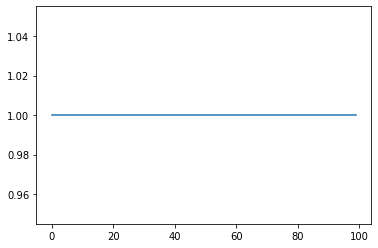

In [3]:
alpha = 0.01
gamma = 0.99
episodes = 100
ep_min_decay = 5000

env = gym.make("LunarLander-v2")
env.seed(42)
np.random.seed(42)
rew_s_va_sg = Sarsa_va_sg.sarsa_va_sg(env, discretization, n_bins, ep_min_decay, alpha, gamma, episodes)

env = gym.make("LunarLander-v2")
env.seed(42)
np.random.seed(42)
rew_s = Sarsa.sarsa(env, discretization, ep_min_decay, alpha, gamma, episodes)

env = gym.make("LunarLander-v2")
rew_r = Random.random(env, episodes)

env = gym.make("LunarLander-v2")
rew_q = Q_learning.q_learning(env, discretization, ep_min_decay, alpha, gamma, episodes)


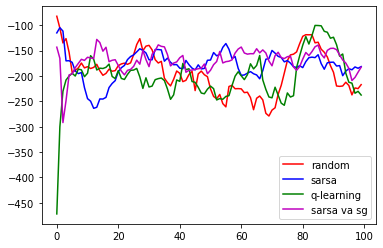

In [4]:
mean_rewards_r = moving_avg(rew_r)
mean_rewards_s = moving_avg(rew_s)
mean_rewards_q = moving_avg(rew_q)
mean_rewards_s_va_sg = moving_avg(rew_s_va_sg)

plt.plot(mean_rewards_r, color="red", label="random")
plt.plot(mean_rewards_s, color="blue", label="sarsa")
plt.plot(mean_rewards_q, color="green", label="q-learning")
plt.plot(mean_rewards_s_va_sg, color="m", label="sarsa va sg")
plt.legend()
plt.show()

In [5]:
episodes = 100

env = gym.make("LunarLander-v2")
rew_nn = Sarsa_va_ANN.sarsa_va_ann(env, 8, ep_min_decay, alpha, gamma, episodes)

0


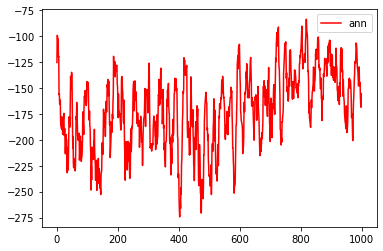

In [ ]:
mean_rewards_r = moving_avg(rew_r)
mean_rewards_s = moving_avg(rew_s)
mean_rewards_q = moving_avg(rew_q)
mean_rewards_s_va_sg = moving_avg(rew_s_va_sg)
mean_rewards_nn = moving_avg(rew_nn)

plt.plot(mean_rewards_nn, color="red", label="ann")
plt.plot(mean_rewards_r, color="red", label="random")
plt.plot(mean_rewards_s, color="blue", label="sarsa")
plt.plot(mean_rewards_q, color="green", label="q-learning")
plt.plot(mean_rewards_s_va_sg, color="m", label="sarsa va sg")
plt.legend()
plt.show()